In [1]:
# Firstly lets import all the libraries that we will be making use of.
import pandas as pd
import numpy as np
import os
import requests
from PIL import Image
from io import BytesIO
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from datetime import datetime, timedelta

## Data Gathering

In this section, we are going to import 3 different files using different methods to download them.

1.  First dataset which is the twitter archive of WeRateDogs was made available to us and has been manually downloaded and will be read using the pandas library

In [2]:
# Import our first dataset using pandas read csv library
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Now lets programmatically download our second dataset which is the tweet image prediction url file using the request library

In [4]:
# Define the url and use the requests.get method to create the request
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
# Access the Content and Write to a File
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [6]:
# Read our tsv dataset into a dataframe
df_image = pd.read_csv('image-predictions.tsv', sep ="\t")

In [7]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Our third dataset will be downloaded using tweepy library from twitter API

In [8]:
# let's create an API object that we can use to gather our twitter data 
consumer_key = 'MY CONSUMER KEY'
consumer_secret = 'MY CONSUMER SECRET'
access_token = 'MY ACCESS TOKEN'
access_secret = 'MY ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)


# #Testing the api by using one tweet id.
tweet = api.get_status('892420643555336193',tweet_mode='extended')
tweet._json

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [9]:
#Check for the number of tweet id in the archive dataframe that we will be using
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

Query Twitter's API for JSON data for each tweet ID in the Twitter archive and write the file as a dictionary 
into tweet_json.txt file

In [10]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e: 
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600


Rate limit reached. Sleeping for: 107


Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
18

Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
20

Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
23

Get additional information from twitter using the tweet IDs from tweet_json.txt file and read this file line by line into a list of dictionaries to create a pandas DataFrame.

In [11]:
# Lets create a list of dictionary to be used
df_tweets_list = []
# lets read to our json file line by line and load the file as a dictionary with only the specific details needed
with open('tweet_json.txt') as tweet_json:
    for t in tweet_json:
        tweet = json.loads(t)
        tweet_id = tweet['id']
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        followers_count = tweet['user']['followers_count']
#         here we then append our dictionary created above into the empty list - df_tweets_list
        df_tweets_list.append({'tweet_id': str(tweet_id),
                              'favorite_count': int(favorite_count),
                              'retweet_count': int(retweet_count),
                              'followers_count': int(followers_count)})  

In [12]:
# Convert our tweet details which is a list of dictionaries - df_tweets_list into a pandas dataframe
df_tweets_json = pd.DataFrame(df_tweets_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count'])

In [13]:
#Check new dataframe to see imported data
df_tweets_json.head()

,tweet_id,favorite_count,retweet_count,followers_count
0,892420643555336193,33696,6969,9359095
1,892177421306343426,29222,5272,9359095
2,891815181378084864,21978,3464,9359095
3,891689557279858688,36787,7191,9359095
4,891327558926688256,35180,7715,9359095


## Assessing Data

- **Visual Assessment** 

The data for our three datasets will be assessed visually to spot issues relating to quality and tidyness

In [14]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
df_tweets_json

,tweet_id,favorite_count,retweet_count,followers_count
0,892420643555336193,33696,6969,9359095
1,892177421306343426,29222,5272,9359095
2,891815181378084864,21978,3464,9359095
3,891689557279858688,36787,7191,9359095
4,891327558926688256,35180,7715,9359095
...,...,...,...,...
2322,666049248165822465,88,36,9359104
2323,666044226329800704,246,115,9359104
2324,666033412701032449,100,36,9359104
2325,666029285002620928,112,39,9359104


__Observations form Visual Assessment__

1. The first dataset df_archive contains a set of information pertaining to each tweet from the tweet archive of WeRateDogs with 2356 rows and 17 columns. The data presents information with tweet informations such as tweet id, timestamp of tweet, url of tweet, dog ratings for the numerator and denominator, dog name, dog classification,  tweet's text and source of tweet. More details will of course be uncovered as  we further unravel our dataset.

2. Our second dataset contains data on image predictions for a number of tweets from the twitter archive of WeRateDogs - df_archive (our first dataset). The dataset contains 2075 rows and 12 columns which signifies that not we werent provided with all the image predictions for  all tweet ids from the first dataset. This dataset contains a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images) and the image predictions details from p1-p3 where p1 is the most confident prediction.

3. The third dataset constitutes additional info gotten from the WeRateDogs twitter archive using twitter API. These additional information on each tweet of the twitter archive includes favorite (like) count, retweet count, followers count, and following count( friends count). 

We can now go further in programmatically assessing our dataset for possible data quality and tidiness issues before we can proceed to document our findings for data cleaning purposes.

- **Programmatic Assessment**

In [17]:
#Check tweet archive dataframe to gain insights on its column variables
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
#Randomly select for 10 row variables to assess for errors
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
480,815736392542261248,NaN,NaN,2017-01-02 01:48:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815736392...,11,10,Akumi,None,None,None,None
1345,704491224099647488,7.044857e+17,28785486.0,2016-03-01 02:19:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 hero af\n@ABC,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
268,841439858740625411,NaN,NaN,2017-03-14 00:04:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have some incredible doggos for #K9Vet...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841439858...,14,10,None,None,None,None,None
1265,709901256215666688,NaN,NaN,2016-03-16 00:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",WeRateDogs stickers are here and they're 12/10...,NaN,NaN,NaN,"http://goo.gl/ArWZfi,https://twitter.com/dog_r...",12,10,None,None,None,None,None
849,766008592277377025,NaN,NaN,2016-08-17 20:27:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Angel. She stole the @ShopWeRateDogs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766008592...,11,10,Angel,None,None,None,None
554,803773340896923648,NaN,NaN,2016-11-30 01:31:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803773340...,12,10,Diogi,None,None,None,puppo
571,801538201127157760,NaN,NaN,2016-11-23 21:29:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. He'll be your chau-fur this e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801538201...,12,10,Wallace,None,None,None,None
753,778774459159379968,NaN,NaN,2016-09-22 01:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: In case you haven't seen the mo...,7.580996e+17,4.196984e+09,2016-07-27 00:40:12 +0000,"https://vine.co/v/hQJbaj1VpIz,https://vine.co/...",13,10,None,None,None,None,None
1710,680583894916304897,NaN,NaN,2015-12-26 03:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. Her tennis ball slowly rolled d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680583894...,8,10,Penny,None,None,None,None
780,775733305207554048,NaN,NaN,2016-09-13 16:30:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anakin. He strives to reach his full d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775733305...,11,10,Anakin,doggo,None,None,None


In [19]:
#Check for duplicate data across the 3 combined datasets
all_columns = pd.Series(list(df_archive) + list(df_image) + list(df_tweets_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [20]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
#assess p1 column to gain insight on row values
df_image.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [22]:
df_tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2327 non-null   object
 1   favorite_count   2327 non-null   int64 
 2   retweet_count    2327 non-null   int64 
 3   followers_count  2327 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [23]:
# Check uniqueness of column values
df_archive.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.862664e+17    1
6.920419e+17    1
6.827884e+17    1
6.842229e+17    1
               ..
8.116272e+17    1
8.131273e+17    1
8.211526e+17    1
8.233264e+17    1
6.670655e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [24]:
#Check for duplicates in tweet archive dataset
df_archive.duplicated().value_counts()

False    2356
dtype: int64

In [25]:
#Check for duplicates in image dataset
df_image.duplicated().value_counts()

False    2075
dtype: int64

In [26]:
#Check for duplicates in tweet json dataset
df_tweets_json.duplicated().value_counts()

False    2327
dtype: int64

In [27]:
#Check for null values in expanded_urls column
df_archive[df_archive.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [28]:
#Check for numerator ratings greater than 15 
df_archive[df_archive.rating_numerator > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [29]:
#Check summary statistics of tweet archive table
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
#Check summary statistics of tweet image prediction table
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
#Check summary statistics of tweet json table
df_tweets_json.describe()

,favorite_count,retweet_count,followers_count
count,2327.000000,2327.000000,2.327000e+03
mean,7026.732703,2458.681564,9.359101e+06
std,10919.809035,4163.722725,2.398687e+00
min,0.000000,1.000000,9.359095e+06
25%,1220.500000,492.500000,9.359100e+06
50%,3037.000000,1144.000000,9.359101e+06
75%,8564.000000,2844.500000,9.359102e+06
max,144247.000000,70331.000000,9.359104e+06


In [32]:
#Check for random row variables in image prediction table
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
71,667200525029539841,https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg,1,Siberian_husky,0.694904,True,malamute,0.232006,True,Eskimo_dog,0.050635,True
436,674410619106390016,https://pbs.twimg.com/media/CVv84VDUEAEm3dW.jpg,1,brown_bear,0.698207,False,sea_lion,0.046475,False,beagle,0.019427,True
664,682697186228989953,https://pbs.twimg.com/media/CXltdtaWYAIuX_V.jpg,1,bald_eagle,0.097232,False,torch,0.096621,False,cliff,0.090385,False
1440,774757898236878852,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,1,toy_poodle,0.719941,True,miniature_poodle,0.251546,True,Lakeland_terrier,0.007008,True
833,693942351086120961,https://pbs.twimg.com/media/CaFg41YWkAAdOjy.jpg,1,groenendael,0.550796,True,Norwegian_elkhound,0.154770,True,schipperke,0.080802,True
391,673576835670777856,https://pbs.twimg.com/media/CVkGjsxU8AA5OYX.jpg,1,teddy,0.255210,False,Christmas_stocking,0.098285,False,pajama,0.072735,False
1425,772193107915964416,https://pbs.twimg.com/media/Crdhh_1XEAAHKHi.jpg,1,Pembroke,0.367945,True,Chihuahua,0.223522,True,Pekinese,0.164871,True
1599,799422933579902976,https://pbs.twimg.com/media/Cxge6AdUQAAvXLB.jpg,1,miniature_pinscher,0.583630,True,redbone,0.276095,True,toy_terrier,0.018550,True
1388,766313316352462849,https://pbs.twimg.com/media/CqJ95SRWgAATPK_.jpg,1,toy_poodle,0.966896,True,miniature_poodle,0.016424,True,cocker_spaniel,0.010227,True
1755,824796380199809024,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False


### Quality Issues

1. **in_reply_to_status_id** and **in_reply_to_user_id** contains too many null values. - `df_archive` _table_

2. tweet_id on `df_archive` and `df_image` _table_ is an integer rather than a string

3. 23 nos. denominator ratings are not equal to 10. - `df_archive` _table_

4. Timestamp column has a datatype of object. - `df_archive` _table_

5. Source column in `df_archive` contains a HTML anchor tag link

6. Retweet information not needed, only original ratings are needed - `df_archive` _table_

7. expanded_url column contains entries with multiple urls and missing values . - `df_archive` _table_

8. 26 nos. numerator rating are greater than the maximum rating of 15. - `df_archive` _table_


### Tidyness Issues

1. Dog description columns such as dog name, dog stage and dog ratings included in same table as tweet description variables.

3. tweets_json should be part of the archive table


## Cleaning Data

Before we perform any cleaning on the data, we would need to make a copy of each dataset.

In [142]:
archive_clean = df_archive.copy() 

In [143]:
image_clean = df_image.copy()

In [144]:
tweets_json_clean = df_tweets_json.copy()

### Issue 1  - `df_archive`: in_reply_to_status_id and in_reply_to_user_id contains too many null values.

__Define__

Drop `in_reply_to_status_id` and `in_reply_to_user_id` columns as they contains too many null values and would be irrelevant.

**Code**

In [145]:
# drop irrelevant columns- in_reply_to_status_id and in_reply_to_user_id

archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1, inplace=True)

**Test**

In [146]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2297 non-null   object 
 8   rating_numerator            2356 non-null   int64  
 9   rating_denominator          2356 non-null   int64  
 10  name                        2356 non-null   object 
 11  doggo                       2356 non-null   object 
 12  floofer                     2356 non-null   object 
 13  pupper                      2356 

### Issue 2 - `df_archive` & ` df_image` -  tweet_id is an integer rather than a string

**Define**

Convert tweet_id datatype to an object datatype in both archive_clean and image_clean tables

**Code**

In [147]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)

**Test**

In [148]:
image_clean['tweet_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


In [149]:
archive_clean['tweet_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2356 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


### Issue 3 - `df_archive`  - 23 nos. denominator ratings are not equal to 10.

#### Define

Since we know that all WeRateDogs ratings are being rated on a scale of 1-10 with some ratings being particularly above 10 to a maximum of 15, we can therefore say that our denominator value must be at a value of 10 as per WeRatDogs Rating system. 
See [here](https://knowyourmeme.com/memes/we-rate-dogs) for reference.

#### Code

In [150]:
# Replace all values above 10 in rating_denominator column with a value of 10

archive_clean.loc[archive_clean['rating_denominator'] != 10, 'rating_denominator'] = 10

#### Test

In [151]:
archive_clean[archive_clean.rating_denominator != 10]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue 4 - `df_archive` - Timestamp column has a datatype of object. 

#### Define

Convert datatype of timestamp column to datetime to better reflect the date&time values of the column

#### Code

In [152]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [153]:
archive_clean['timestamp'].dtypes

datetime64[ns, UTC]

### Issue 5 - `df_archive` -  Source column contains a HTML anchor tag link

#### Define

Extract only the device source from the html anchor tag to represent the type of device that was used to access twitter

#### Code

In [154]:
# lets check the source column to see the value count per entry
archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [155]:
# Extract only the text value prior to </a>
archive_clean['source'] = archive_clean['source'].str.split(">", expand=True, n=1)[1].str[:-4]

#### Test

In [156]:
archive_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

Now we have a source column that shows us the device information that each tweet id was created from

### Issue 6 - `df_archive` :  Retweet information not needed, only original ratings are needed.

#### Define

Remove all retweet data from the archive dataset -including columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp  and row observations containing retweet data. 

#### Code

In [157]:
# Lets find out the no of rows with RT information as their values
archive_clean.retweeted_status_id.isnull().value_counts()

True     2175
False     181
Name: retweeted_status_id, dtype: int64

From the above observation, 181 rows contains retweet data which needs to be dropped.

In [158]:
# lets drop the 181 rows containing retweet observation/values
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [159]:
# Drop all of these columns from our dataset - retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [160]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue 7 -  `df_archive` : expanded_url column contains entries with multiple urls and missing values

#### Define

Split the extended_urls column using the comma seperator and the str.split function and assigned the left part of the list back to the expanded_urls column such that all the row entries will not have only one url.

#### Code

In [161]:
# Let us check to see how many multiple entries the extended_urls column have
archive_clean['expanded_urls'].str.split(",", expand=True)

,0,1,2,3,4
0,https://twitter.com/dog_rates/status/892420643...,None,None,None,None
1,https://twitter.com/dog_rates/status/892177421...,None,None,None,None
2,https://twitter.com/dog_rates/status/891815181...,None,None,None,None
3,https://twitter.com/dog_rates/status/891689557...,None,None,None,None
4,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891327558...,None,None,None
...,...,...,...,...,...
2351,https://twitter.com/dog_rates/status/666049248...,None,None,None,None
2352,https://twitter.com/dog_rates/status/666044226...,None,None,None,None
2353,https://twitter.com/dog_rates/status/666033412...,None,None,None,None
2354,https://twitter.com/dog_rates/status/666029285...,None,None,None,None


the extended_url has as much as five urls in some rows and this needs to be properly cleaned. The 0 column above has the first url while other extra columns have additional url not needed. Therefore, we would split and remove out the extra urls.

In [162]:
# Now lets remove all multiple entries from the extended_urls column so it has just one url
archive_clean['expanded_urls'] = archive_clean['expanded_urls'].str.split(",", expand=True)[0]

#### Test

In [163]:
archive_clean['expanded_urls'].str.split(",", expand=True)

,0
0,https://twitter.com/dog_rates/status/892420643...
1,https://twitter.com/dog_rates/status/892177421...
2,https://twitter.com/dog_rates/status/891815181...
3,https://twitter.com/dog_rates/status/891689557...
4,https://twitter.com/dog_rates/status/891327558...
...,...
2351,https://twitter.com/dog_rates/status/666049248...
2352,https://twitter.com/dog_rates/status/666044226...
2353,https://twitter.com/dog_rates/status/666033412...
2354,https://twitter.com/dog_rates/status/666029285...


Now we can clearly see that the expanded_urls column does not have multiple entries anymore.

### Issue 7b: missing values in expanded_urls column

#### Define

We have one extra issue with the expanded_urls column - missing values. To fix the issue of missing values in the expanded_urls column, we can attempt to source for that data from our image_prediction dataset which we extracted from WeRateDogs twitter archive using twitter API. Or, we can decide to just drop all rows with missing urls since we won't be needing it any further.

### Code

In [164]:
# Check the number of missing rows in the table.
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

In [165]:
# Drop rows with missing urls.
archive_clean.dropna(inplace=True)

### Test

In [166]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   object             
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   doggo               2117 non-null   object             
 9   floofer             2117 non-null   object             
 10  pupper              2117 non-null   object             
 11  puppo               2117 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

Now we can clearly see that all columns have same number or rows

### Issue 8 - `df_archive` : 25 nos. numerator rating are greater than the maximum rating of 15. 

#### Define

The numerator ratings greater than 15 will be filtered out and checked for error from the text columns. Then we will manually check the data to get the rating from the text column manually and replace these correct values to the erroneous ones in the numerator ratings column. Also where such ratings were not gotten manually from visually assessment the text column, a mean numerator rating is used to replace the erroneous fields remaining

#### Code

In [167]:
#Create dataframe of data with numerator ratings greater than 15
archive_clean[archive_clean.rating_numerator > 15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40+00:00,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,10,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,https://www.gofundme.com/sams-smile,24,10,Sam,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,2016-07-28 01:00:57+00:00,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,10,None,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54+00:00,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,10,this,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,10,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02+00:00,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,10,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49+00:00,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,10,None,None,None,None,None


From visual assessment of the above data of numerator ratings above 15, it can be seen that there are several reasons for this erroneous ratings ranging from group ratings of a couple of dogs, erroneous data entry of rating, and some dogs were not rated at all numbering 19 ratings that were affected. Thus, we are going to attempt to correct them from the text column. 

In [168]:
# create a dataframe with only columns text and rating_numerator for visual assessment
archive_clean[archive_clean.rating_numerator > 15]['text']

433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
695     This is Logan, the Chow who lived. He solemnly...
763     This is Sophie. She's a Jubilant Bush Pupper. ...
902     Why does this never happen at my front door......
979     This is Atticus. He's quite simply America af....
1120    Say hello to this unbelievably well behaved sq...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someone help the girl is being mugged. Several...
1712    Here we have uncovered an entire battalion of ...
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
1843    Here w

From manual assessment of the text column, we were able to get the correct numerator ratings for only 16 of these erroneous values. We will attempt to replace all 16 of these wrong values with their right values. As for the remaining 3 values, since they weren't given any rating, we will replace them with the mean numerator ratings.

In [169]:
# Find the mean numerator ratings
archive_clean['rating_numerator'].mean()

12.246102975909306

In [170]:
# Replace all 16 fields with the correctly gotten ratings
archive_clean['rating_numerator'].replace([84,75,27,165,204,50,99,80,45,60,44,143,121,20,26,144,88],[12,10,11,13,13,11,11,10,9,12,11,11,11,13,11,12,11], inplace=True)

In [171]:
# Replace remaining 6 ratings with greater than 15 with the mean numerator rating of 12
archive_clean['rating_numerator'].replace([182,24,1776,420],12, inplace=True)

#### Test

In [172]:
# Lets check our dataset to confirm that all fields have been properly replaced.
archive_clean[archive_clean.rating_numerator > 15]['rating_numerator']

Series([], Name: rating_numerator, dtype: int64)

### Tidyness

### Issue 1 -  `df_archive` :  Dog description columns such as dog name, dog stage and dog ratings included in same table as tweet description variables.

#### Define

We are going to extract all columns with dog info from the archive_clean table and use that info to create a new table called dog_info

#### Code

In [173]:
image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [174]:
# Create a new table called dog_info
dog_info = archive_clean[['tweet_id','rating_numerator','rating_denominator','name','doggo','floofer','pupper','puppo']]
dog_info

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,13,10,Phineas,None,None,None,None
1,892177421306343426,13,10,Tilly,None,None,None,None
2,891815181378084864,12,10,Archie,None,None,None,None
3,891689557279858688,13,10,Darla,None,None,None,None
4,891327558926688256,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...
2351,666049248165822465,5,10,None,None,None,None,None
2352,666044226329800704,6,10,a,None,None,None,None
2353,666033412701032449,9,10,a,None,None,None,None
2354,666029285002620928,7,10,a,None,None,None,None


Create a new table for dog info involving all variables in the dog_info table and the dog informations from the image prediction table.

In [175]:
# Merge dog_info with additional dog information from the image prediction table.
dog_extra_info = image_clean[['tweet_id','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']]
dog_info = pd.merge(dog_extra_info, dog_info,
                            on='tweet_id', how='left')

In [176]:
# Drop tweet_id column as it is not a dog info variable
dog_info.drop('tweet_id',axis=1, inplace=True)

#### Test

In [177]:
dog_info

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8.0,10.0,None,None,None,None,None
1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,7.0,10.0,a,None,None,None,None
2,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,9.0,10.0,a,None,None,None,None
3,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,6.0,10.0,a,None,None,None,None
4,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,5.0,10.0,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12.0,10.0,Franklin,None,None,None,None
2071,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13.0,10.0,Darla,None,None,None,None
2072,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12.0,10.0,Archie,None,None,None,None
2073,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13.0,10.0,Tilly,None,None,None,None


### Issue 2 -  tweets_json should be part of the archive table

#### Define

All the columns in tweets_json table will be merged with the archive_clean table to form a combined table called tweet_info 

#### Code

In [178]:
# The dog info columns in archive_clean table will be dropped
archive_clean = archive_clean.drop(['rating_numerator','rating_denominator','name','doggo','floofer','pupper','puppo'], axis=1)

In [179]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...
...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...


In [180]:
tweets_json_clean

,tweet_id,favorite_count,retweet_count,followers_count
0,892420643555336193,33696,6969,9359095
1,892177421306343426,29222,5272,9359095
2,891815181378084864,21978,3464,9359095
3,891689557279858688,36787,7191,9359095
4,891327558926688256,35180,7715,9359095
...,...,...,...,...
2322,666049248165822465,88,36,9359104
2323,666044226329800704,246,115,9359104
2324,666033412701032449,100,36,9359104
2325,666029285002620928,112,39,9359104


In [181]:
tweets_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2327 non-null   object
 1   favorite_count   2327 non-null   int64 
 2   retweet_count    2327 non-null   int64 
 3   followers_count  2327 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [182]:
# tweet_id column in archive_clean table is an integer and may hinder our merging process. We therefore will convert it to string
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

In [183]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2117 non-null   object             
 1   timestamp      2117 non-null   datetime64[ns, UTC]
 2   source         2117 non-null   object             
 3   text           2117 non-null   object             
 4   expanded_urls  2117 non-null   object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 99.2+ KB


In [184]:
# Merge archive_clean table with the tweets_json table to create a new tweet_info table.
tweet_info = pd.merge(archive_clean, tweets_json_clean,
                            on='tweet_id', how='left')

#### Test

In [185]:
tweet_info

,tweet_id,timestamp,source,text,expanded_urls,favorite_count,retweet_count,followers_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,33696.0,6969.0,9359095.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,29222.0,5272.0,9359095.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,21978.0,3464.0,9359095.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,36787.0,7191.0,9359095.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,35180.0,7715.0,9359095.0
...,...,...,...,...,...,...,...,...
2112,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,88.0,36.0,9359104.0
2113,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,246.0,115.0,9359104.0
2114,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,100.0,36.0,9359104.0
2115,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,112.0,39.0,9359104.0


Now we have two master dataframes `dog_info` and `tweet_info` tables containing our dog information and tweet information data.

### Storing Data

In [186]:
# Save both master Dataframes 

tweet_info.to_csv('twitter_archive_master.csv', index=False)

In [187]:
dog_info.to_csv('dog_info_master.csv', index=False)

### Analyzing and Visualizing Data

In order to analyze and visualize both of our master dataset, we will assess both dataset and carry out some extra cleaning to suit the type of analyses we want to perform on it.

In [188]:
#View our tweet data
tweet_info

,tweet_id,timestamp,source,text,expanded_urls,favorite_count,retweet_count,followers_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,33696.0,6969.0,9359095.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,29222.0,5272.0,9359095.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,21978.0,3464.0,9359095.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,36787.0,7191.0,9359095.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,35180.0,7715.0,9359095.0
...,...,...,...,...,...,...,...,...
2112,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,88.0,36.0,9359104.0
2113,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,246.0,115.0,9359104.0
2114,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,100.0,36.0,9359104.0
2115,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,112.0,39.0,9359104.0


In [189]:
#Check for missing row values on tweet info table
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2117 non-null   object             
 1   timestamp        2117 non-null   datetime64[ns, UTC]
 2   source           2117 non-null   object             
 3   text             2117 non-null   object             
 4   expanded_urls    2117 non-null   object             
 5   favorite_count   2109 non-null   float64            
 6   retweet_count    2109 non-null   float64            
 7   followers_count  2109 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(4)
memory usage: 148.9+ KB


In [190]:
#Check for missing row values on dog info table 
dog_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   p1                  2075 non-null   object 
 1   p1_conf             2075 non-null   float64
 2   p1_dog              2075 non-null   bool   
 3   p2                  2075 non-null   object 
 4   p2_conf             2075 non-null   float64
 5   p2_dog              2075 non-null   bool   
 6   p3                  2075 non-null   object 
 7   p3_conf             2075 non-null   float64
 8   p3_dog              2075 non-null   bool   
 9   rating_numerator    1994 non-null   float64
 10  rating_denominator  1994 non-null   float64
 11  name                1994 non-null   object 
 12  doggo               1994 non-null   object 
 13  floofer             1994 non-null   object 
 14  pupper              1994 non-null   object 
 15  puppo               1994 non-null   object 
dtypes: boo

In [191]:
# Drop NaN values from tweet table.
tweet_info.dropna(inplace=True)

In [192]:
# Drop missing values from dog table.
dog_info.dropna(inplace=True)

In [193]:
#Check to make sure missing values were dropped
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2116
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2109 non-null   object             
 1   timestamp        2109 non-null   datetime64[ns, UTC]
 2   source           2109 non-null   object             
 3   text             2109 non-null   object             
 4   expanded_urls    2109 non-null   object             
 5   favorite_count   2109 non-null   float64            
 6   retweet_count    2109 non-null   float64            
 7   followers_count  2109 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(4)
memory usage: 148.3+ KB


In [194]:
#Check to make sure missing values were dropped
dog_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   p1                  1994 non-null   object 
 1   p1_conf             1994 non-null   float64
 2   p1_dog              1994 non-null   bool   
 3   p2                  1994 non-null   object 
 4   p2_conf             1994 non-null   float64
 5   p2_dog              1994 non-null   bool   
 6   p3                  1994 non-null   object 
 7   p3_conf             1994 non-null   float64
 8   p3_dog              1994 non-null   bool   
 9   rating_numerator    1994 non-null   float64
 10  rating_denominator  1994 non-null   float64
 11  name                1994 non-null   object 
 12  doggo               1994 non-null   object 
 13  floofer             1994 non-null   object 
 14  pupper              1994 non-null   object 
 15  puppo               1994 non-null   object 
dtypes: boo

In [195]:
# Convert datatype of favorite count column to integer
tweet_info['favorite_count'] = tweet_info['favorite_count'].astype(int)

In [196]:
# Convert datatype of retweet count column to integer
tweet_info['retweet_count'] = tweet_info['retweet_count'].astype(int)

In [197]:
# Convert datatype of followers count column to integer
tweet_info['followers_count'] = tweet_info['followers_count'].astype(int)

In [198]:
# Convert datatype of numerator rating column to integer
dog_info.rating_numerator = dog_info.rating_numerator.astype(int)

In [199]:
# Convert datatype of denominator rating column to integer
dog_info.rating_denominator = dog_info.rating_denominator.astype(int)

In [200]:
#Check to confirm changes were applied in the selected columns
dog_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   p1                  1994 non-null   object 
 1   p1_conf             1994 non-null   float64
 2   p1_dog              1994 non-null   bool   
 3   p2                  1994 non-null   object 
 4   p2_conf             1994 non-null   float64
 5   p2_dog              1994 non-null   bool   
 6   p3                  1994 non-null   object 
 7   p3_conf             1994 non-null   float64
 8   p3_dog              1994 non-null   bool   
 9   rating_numerator    1994 non-null   int32  
 10  rating_denominator  1994 non-null   int32  
 11  name                1994 non-null   object 
 12  doggo               1994 non-null   object 
 13  floofer             1994 non-null   object 
 14  pupper              1994 non-null   object 
 15  puppo               1994 non-null   object 
dtypes: boo

We can now assess both of our cleaned master data to gain insights from the data. 

To analyse our data for insights, we would proceed to ask 3 questions and attempt to use the data to find answers to these questions in order to garner some insights

### Research Questions

1. How many tweet images corresponds to a breed of dog, and how many were not dog images.

2. What is the proportion of dog ratings across the different dog images reviewed.

3. Which day of the year and month within the period had the highest amount of likes and retweets.


### 1 - How many tweet images corresponds to a breed of dog, and how many were not dog images.

In [201]:
dog_info

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8,10,None,None,None,None,None
1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,7,10,a,None,None,None,None
2,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,9,10,a,None,None,None,None
3,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,6,10,a,None,None,None,None
4,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,5,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12,10,Franklin,None,None,None,None
2071,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13,10,Darla,None,None,None,None
2072,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12,10,Archie,None,None,None,None
2073,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13,10,Tilly,None,None,None,None


In [202]:
# visually assessing both column for assessment
dog_info[['p1','p1_dog']]

,p1,p1_dog
0,Welsh_springer_spaniel,True
1,redbone,True
2,German_shepherd,True
3,Rhodesian_ridgeback,True
4,miniature_pinscher,True
...,...,...
2070,basset,True
2071,paper_towel,False
2072,Chihuahua,True
2073,Chihuahua,True


In [203]:
#Count of dog images against non-dog images assessed
dog_info['p1_dog'].value_counts()

True     1477
False     517
Name: p1_dog, dtype: int64

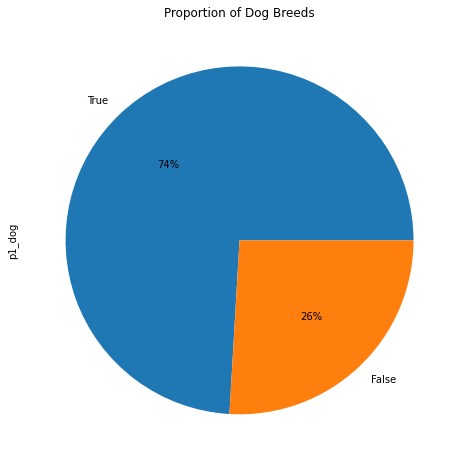

In [204]:
# let's create a pie chart to show the distribution of tweet images that were either dogs or not
dog_info['p1_dog'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.0f%%',title='Proportion of Dog Breeds');

From the analysis above, from a total of 1994 dog images assessed, we can see that only 1477 were dog breeds while 517 were not dog breeds

### 2 - What is the proportion of dog ratings across the different dog images reviewed

In [205]:
#create a subset table to display both columns- p1 and numerator ratings
dog_info[['p1','rating_numerator']]

,p1,rating_numerator
0,Welsh_springer_spaniel,8
1,redbone,7
2,German_shepherd,9
3,Rhodesian_ridgeback,6
4,miniature_pinscher,5
...,...,...
2070,basset,12
2071,paper_towel,13
2072,Chihuahua,12
2073,Chihuahua,13


In [206]:
# Firstly lets filter our dataset for only dog data.
dog_info[dog_info['p1_dog'] == True]

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8,10,None,None,None,None,None
1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,7,10,a,None,None,None,None
2,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,9,10,a,None,None,None,None
3,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,6,10,a,None,None,None,None
4,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,5,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,13,10,Jax,None,None,None,None
2069,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,13,10,None,None,None,None,None
2070,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12,10,Franklin,None,None,None,None
2072,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12,10,Archie,None,None,None,None


In [207]:
# proportion of Dog Ratings per count of dog images
dog_info.groupby('rating_numerator')['p1'].count().sort_values(ascending=False)

rating_numerator
12    456
10    421
11    404
13    263
9     152
8      95
7      52
14     35
5      33
6      32
3      19
4      16
2       9
1       5
0       2
Name: p1, dtype: int64

In [208]:
#Lets find out the mean dog rating for all dog images rated within the period.
dog_info['rating_numerator'].mean()

10.545636910732197

In [209]:
#Check for unique breeds of dog predictions
dog_info['p1'].nunique()

374

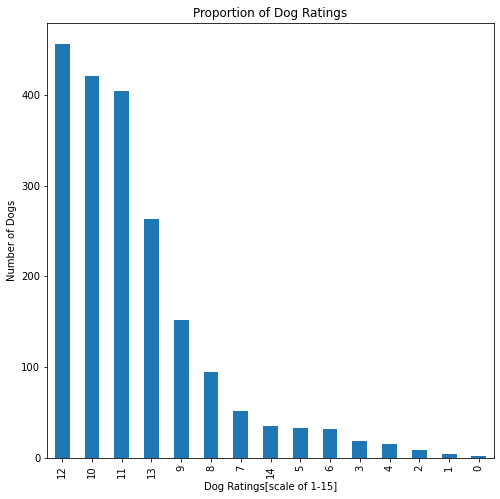

In [210]:
dog_info.groupby('rating_numerator')['p1'].count().sort_values(ascending=False).plot(kind='bar', figsize=(8,8),xlabel='Dog Ratings[scale of 1-15]',ylabel='Number of Dogs',title='Proportion of Dog Ratings');

We have 1477 dog image data with 374 unique dog breeds across our dataset with the highest proportion of dog ratings of 12 followed by 10, and then 11, while the lowest dog rating was 0 as clearly seen in bar chart above.
Therefore as reviewed above, 35 dog images received the highest rating of 14 whilst dog ratings of 12 had the highest amount of dog image reviews with a average dog rating of 10 overall within the period.

### 3 - Which day of year and month within the period had the highest amount of likes and retweets.

To answer this question correctly, we would need to create new columns for day of year, year, and month

In [211]:
# Create a new column for 'day of year'
tweet_info['day_of_year'] = tweet_info['timestamp'].dt.dayofyear

In [212]:
#Create a new column for year
tweet_info['year'] = tweet_info['timestamp'].dt.year

In [213]:
#Create a new column for month
tweet_info['month'] = tweet_info['timestamp'].dt.month

In [214]:
#Lets extract only the columns we need for our anlysis and assess visually
tweet_info[['favorite_count','retweet_count','day_of_year','year','month']]

,favorite_count,retweet_count,day_of_year,year,month
0,33696,6969,213,2017,8
1,29222,5272,213,2017,8
2,21978,3464,212,2017,7
3,36787,7191,211,2017,7
4,35180,7715,210,2017,7
...,...,...,...,...,...
2112,88,36,320,2015,11
2113,246,115,320,2015,11
2114,100,36,319,2015,11
2115,112,39,319,2015,11


In [215]:
# Create a summary statistics to know the details of retweet count and favorite count
tweet_info[['favorite_count','retweet_count','day_of_year','year','month']].describe()

,favorite_count,retweet_count,day_of_year,year,month
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,7710.731626,2280.825036,199.996207,2015.856804,7.058321
std,11244.898983,4002.759015,126.534322,0.690390,4.122175
min,66.000000,11.000000,1.000000,2015.000000,1.000000
25%,1704.000000,506.000000,72.000000,2015.000000,3.000000
50%,3503.000000,1101.000000,196.000000,2016.000000,7.000000
75%,9548.000000,2598.000000,331.000000,2016.000000,11.000000
max,144247.000000,70331.000000,366.000000,2017.000000,12.000000


From the above table, the highest favorite count is 144247 while retweet count is 70331.
Now lets find out the day of year, the year and the month that had such figure

In [216]:
tweet_info[tweet_info.favorite_count == 144247]

,tweet_id,timestamp,source,text,expanded_urls,favorite_count,retweet_count,followers_count,day_of_year,year,month
829,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,144247,70331,9359103,170,2016,6


From the above, we can see that within the period of November 2015 to August 2017,the tweet with the highest retweet count and favorite count(likes) was tweeted on the 18th of June 2016 on the 170th day of the year. We can even see the tweet source and other information about that particular tweet.